# Constant density of modes

In [1]:
import numpy as np
import dom
from equation import solve4beta

In [ ]:
const_opt = solve4beta(dom.const, beta_range=np.logspace(-7,3,num=501))
# np.savetxt('const_1e7.csv', const_opt, delimiter=',')

beta start at 1.0


## plot

Plot for constant DoM

In [1]:
from plot import plot_const

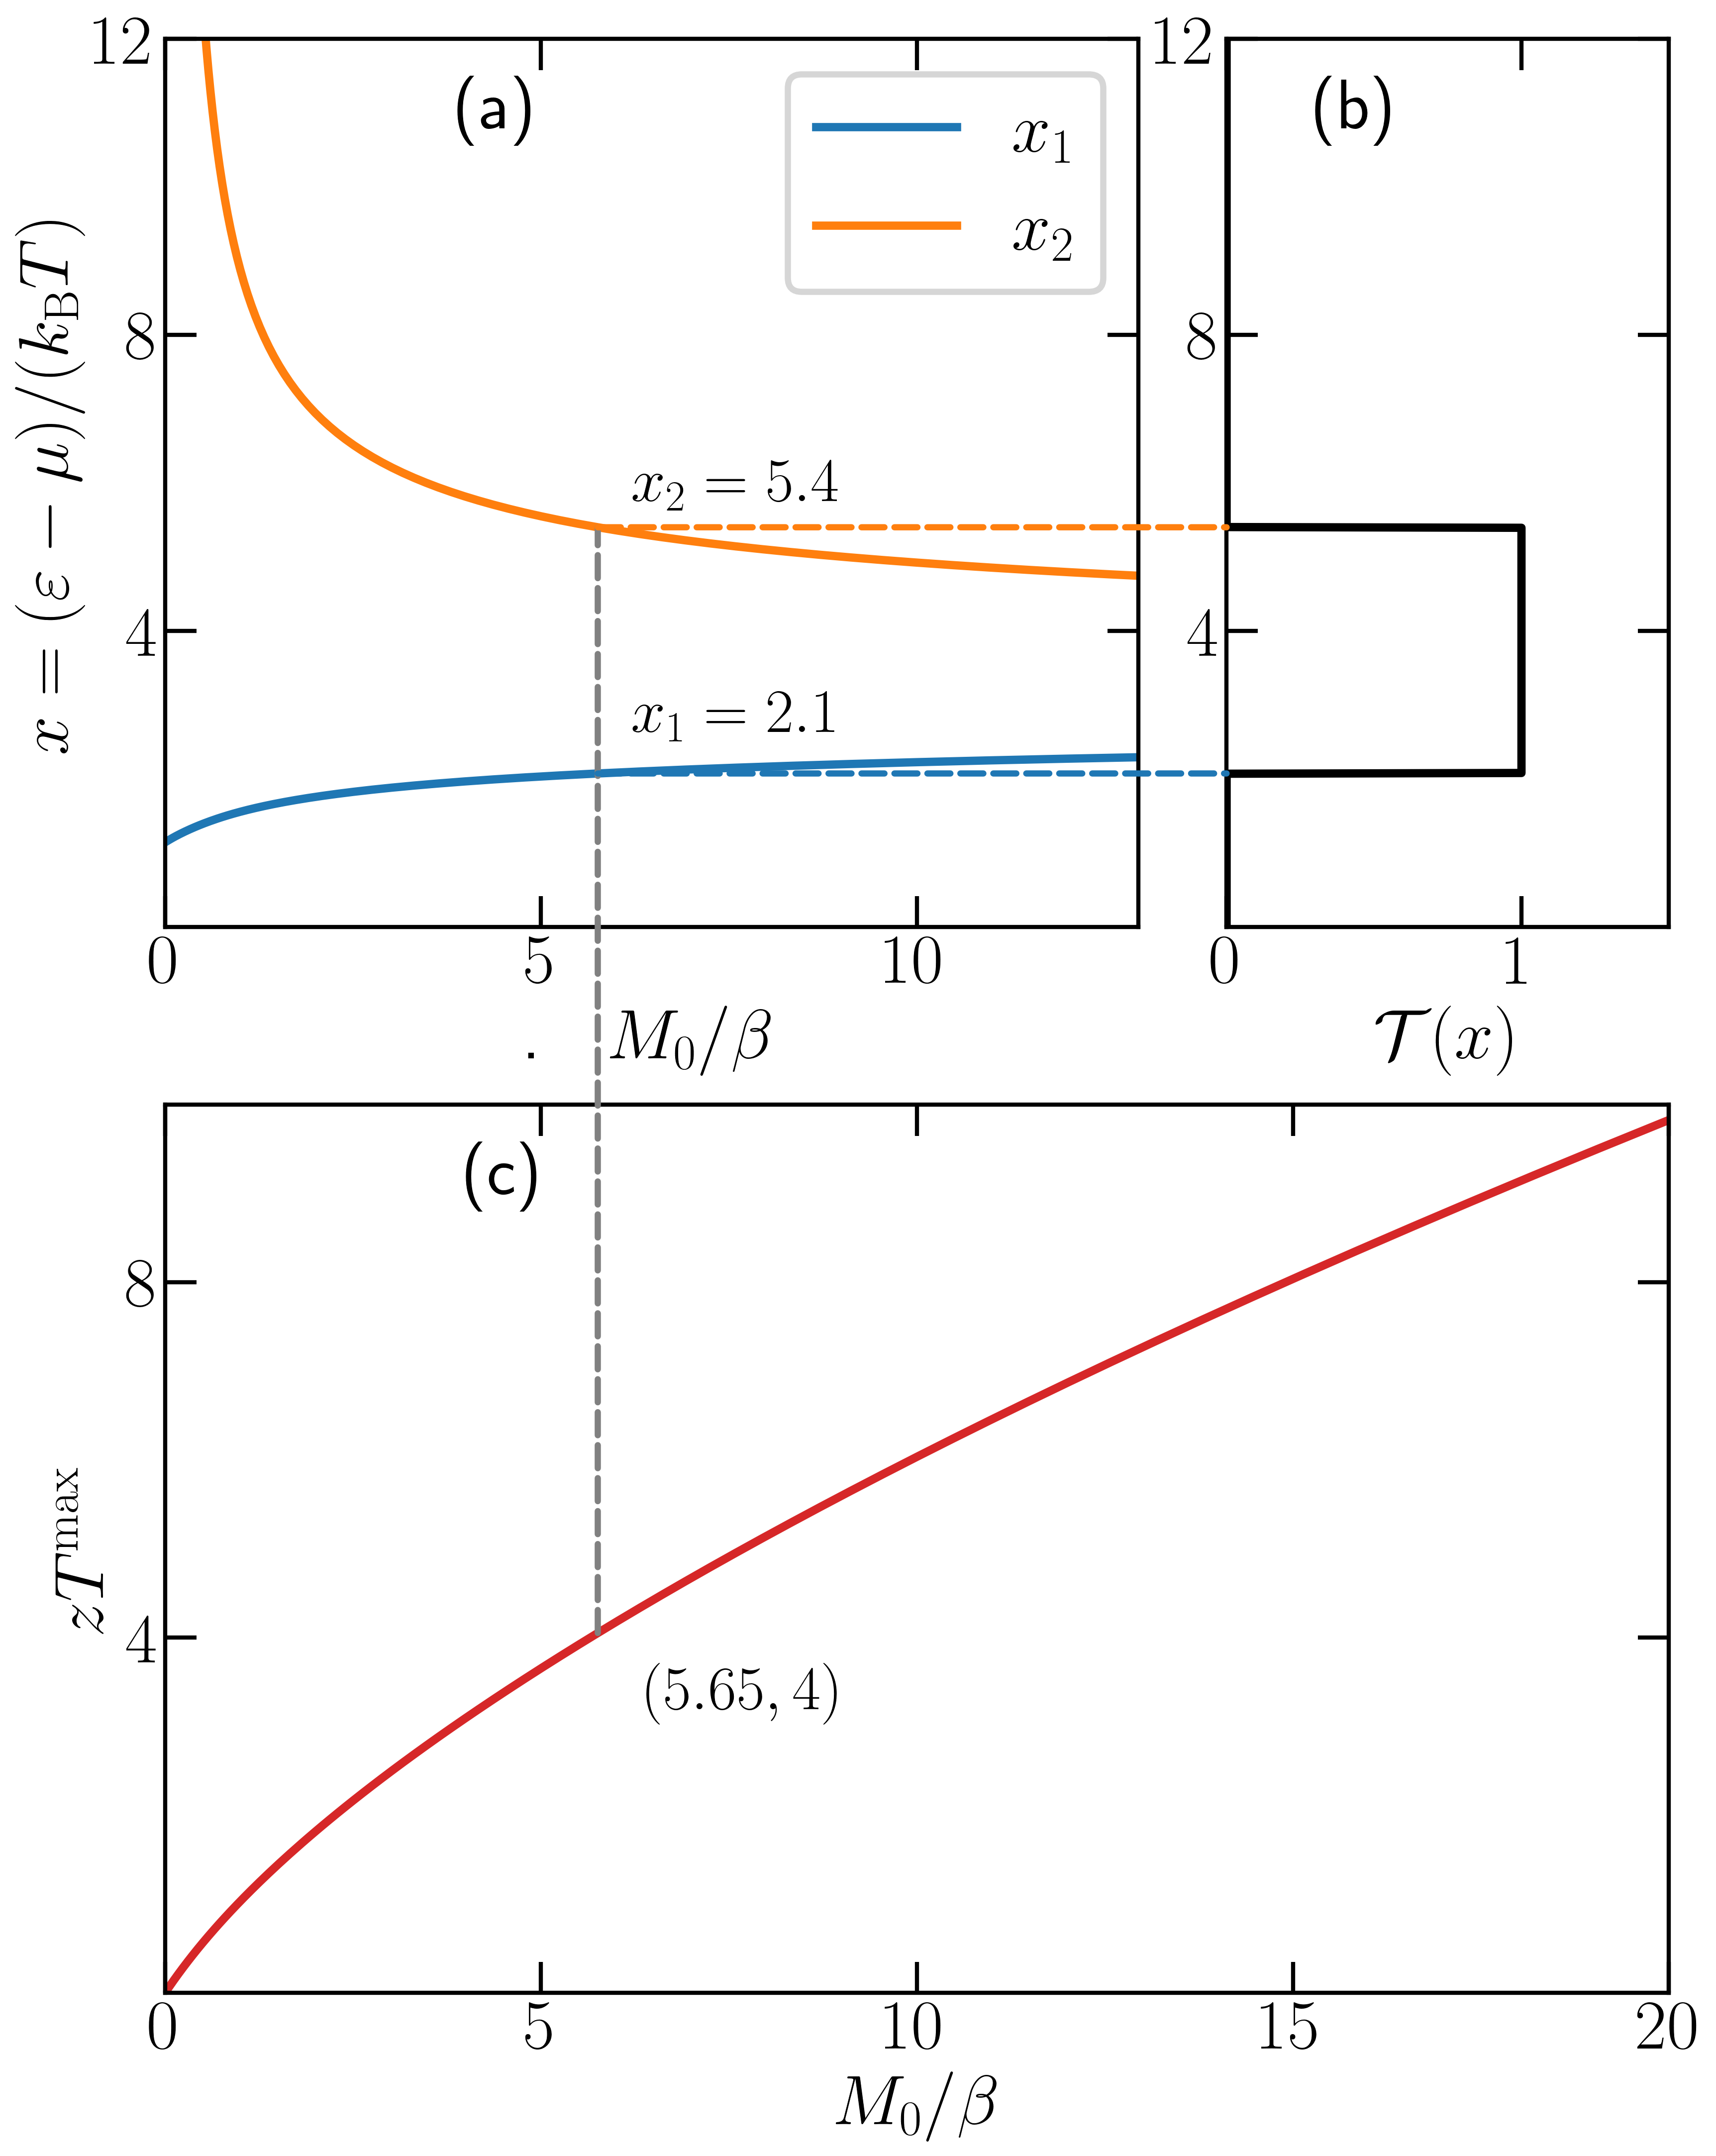

In [2]:
_ = plot_const()

In [ ]:
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['text.usetex'] = True
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.direction'] = 'in'
import matplotlib.pyplot as plt
mpl.rcParams['font.size'] = 34
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['patch.linewidth'] = 3
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.size'] = 15
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 15
mpl.rcParams['ytick.major.width'] = 2
from matplotlib.patches import ConnectionPatch

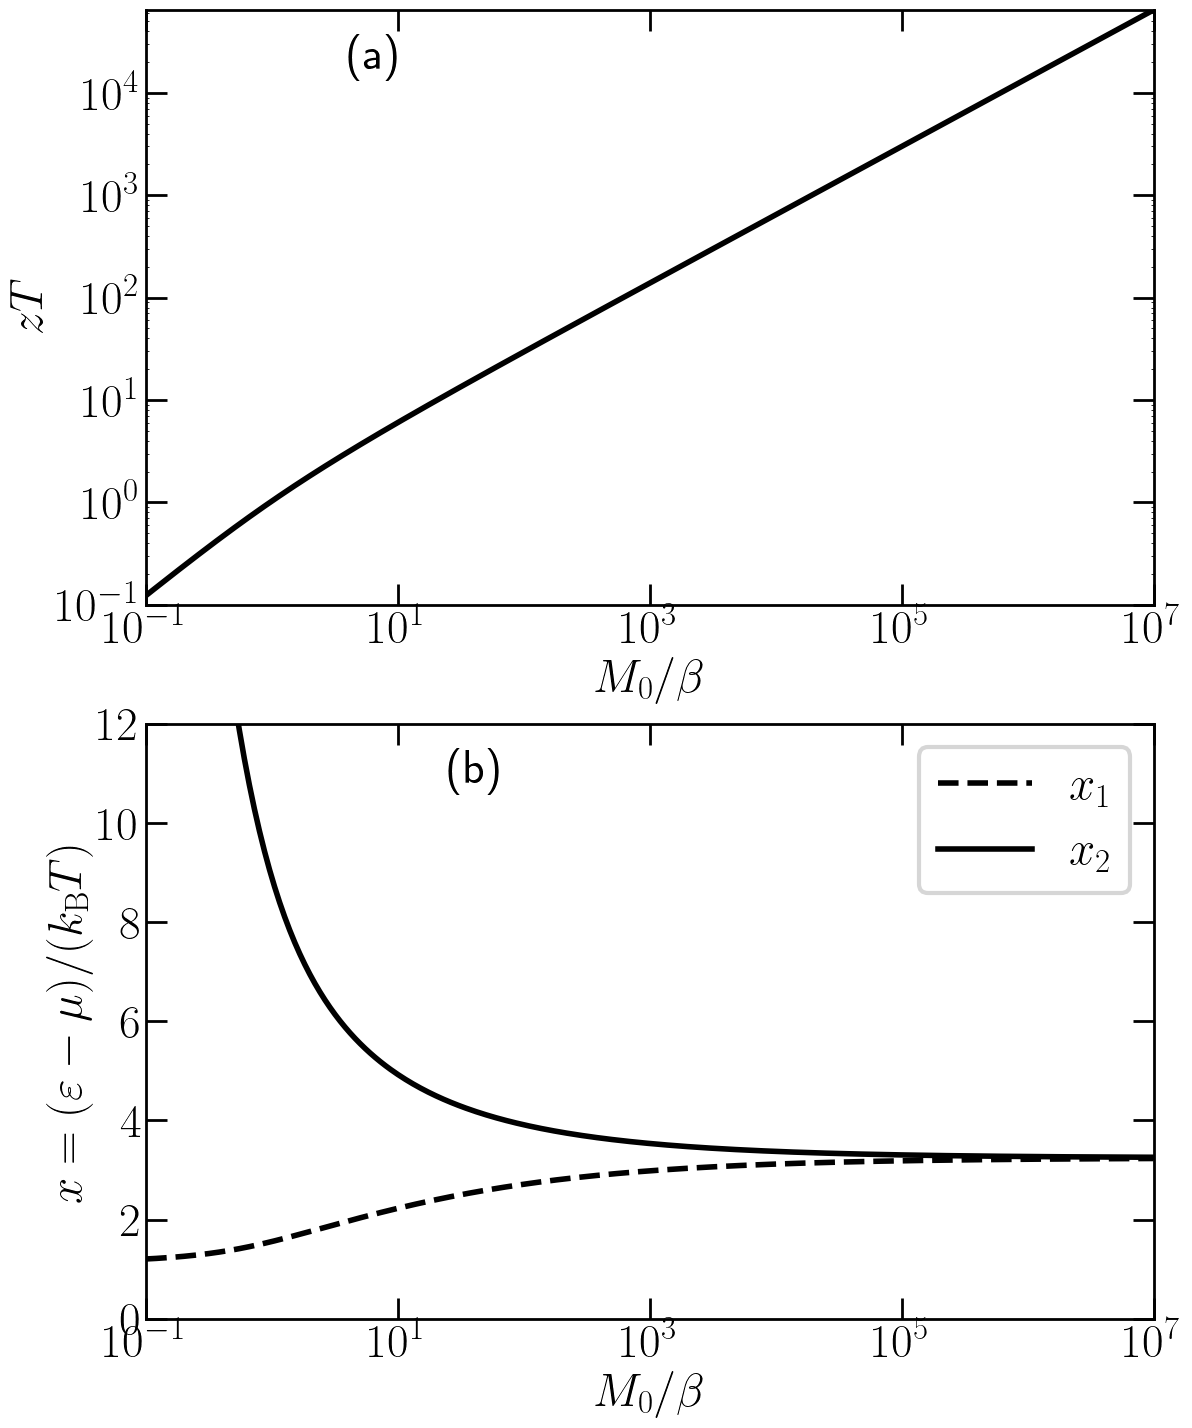

In [ ]:
def logplot_const():
    data = np.loadtxt('const_1e7.csv',delimiter=',')
    _, (ax1, ax2) = plt.subplots(2,1, figsize=(13, 17))
    ax1.plot(data[:,0], data[:,3], 'k')
    xlim = (1e-1, 1e7)
    ax1.set_xlim(*xlim)
    ax1.set_xscale("log", base=10)
    ax1.set_xlabel(r"$M_0/\beta$")
    ax1.set_ylim(1e-1, 6.5e4)
    ax1.set_yscale("log", base=10)
    ax1.set_ylabel(r'$zT$')
    ax1.text(0.2, 0.9, '(a)',transform=ax1.transAxes)
    ax2.plot(data[:,0],data[:,1], 'k--',label=r'$x_1$')
    ax2.plot(data[:,0],data[:,2], 'k', label=r'$x_2$')
    ax2.legend()
    ax2.set_xlim(*xlim)
    ax2.set_xscale("log", base=10)
    ax2.set_xlabel(r"$M_0/\beta$")
    ax2.set_ylim(0, 12)
    # ax2.set_yscale("log", base=10)
    ax2.set_ylabel(r'$x=(\varepsilon-\mu)/(k_\mathrm{B}T)$')
    ax2.text(0.3, 0.9, '(b)',transform=ax2.transAxes)
logplot_const()